In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('prices.csv')

In [3]:
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
print('Number of Companies: '+ str(data['symbol'].nunique())) #Number of unique companies in dataset
print(data['symbol'].unique())#Name of all companies

Number of Companies: 501
['WLTW' 'A' 'AAL' 'AAP' 'AAPL' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIZ' 'AJG' 'AKAM'
 'ALB' 'ALK' 'ALL' 'ALXN' 'AMAT' 'AME' 'AMG' 'AMGN' 'AMP' 'AMT' 'AMZN'
 'AN' 'ANTM' 'AON' 'APA' 'APC' 'APD' 'APH' 'ARNC' 'ATVI' 'AVB' 'AVGO'
 'AVY' 'AWK' 'AXP' 'AYI' 'AZO' 'BA' 'BAC' 'BAX' 'BBBY' 'BBT' 'BBY' 'BCR'
 'BDX' 'BEN' 'BHI' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C'
 'CA' 'CAG' 'CAH' 'CAT' 'CB' 'CBG' 'CBS' 'CCI' 'CCL' 'CELG' 'CERN' 'CF'
 'CHD' 'CHK' 'CHRW' 'CI' 'CINF' 'CL' 'CLX' 'CMA' 'CMCSA' 'CME' 'CMG' 'CMI'
 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COH' 'COL' 'COO' 'COP' 'COST' 'CPB' 'CRM'
 'CSCO' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD'
 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS' 'DISCA' 'DISCK' 'DLR' 'DLTR'
 'DNB' 'DOV' 'DOW' 'DPS' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN' 'EA' 'EBAY' 'ECL'
 'ED' 'EFX' 'EIX' 'EL' 'EMN' 'EMR' 'ENDP' 'EOG' 'EQIX' 'EQR' 'EQT' 'ES'
 'ESRX' 'ESS' 'ETFC' 'ETN' 'ETR

In [5]:
data.shape

(851264, 7)

In [6]:
#Shape of each company
print((data[data['symbol']=='AAPL']).shape)
print((data[data['symbol']=='ADM']).shape)
print((data[data['symbol']=='AMZN']).shape)
print((data[data['symbol']=='GOOGL']).shape)
print((data[data['symbol']=='IBM']).shape)

(1762, 7)
(1762, 7)
(1762, 7)
(1762, 7)
(1762, 7)


In [7]:
#Creating dataset containing selected 5 Companies
data_upd = data[(data['symbol']=='AAPL')| (data['symbol']=='ADM')|(data['symbol']=='AMZN')| (data['symbol']=='GOOGL')|(data['symbol']=='IBM')].reset_index(drop= True)

In [8]:
data_upd

,date,symbol,open,close,low,high,volume
0,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
1,2010-01-04,ADM,31.480000,31.469999,31.330000,31.840000,3472500.0
2,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
3,2010-01-04,GOOGL,626.950006,626.750011,624.240011,629.510005,3908400.0
4,2010-01-04,IBM,131.179993,132.449997,130.850006,132.970001,6155300.0
...,...,...,...,...,...,...,...
8805,2016-12-30,AAPL,116.650002,115.820000,115.430000,117.199997,30586300.0
8806,2016-12-30,ADM,45.419998,45.650002,45.029999,45.689999,2509000.0
8807,2016-12-30,AMZN,766.469971,749.869995,748.280029,767.400024,4125300.0
8808,2016-12-30,GOOGL,803.210022,792.450012,789.619995,803.289978,1728300.0


In [9]:
#Time period of dataset given
print(data_upd[data_upd['symbol']=='GOOGL']['date'].max())
print(data_upd[data_upd['symbol']=='GOOGL']['date'].min())

2016-12-30
2010-01-04


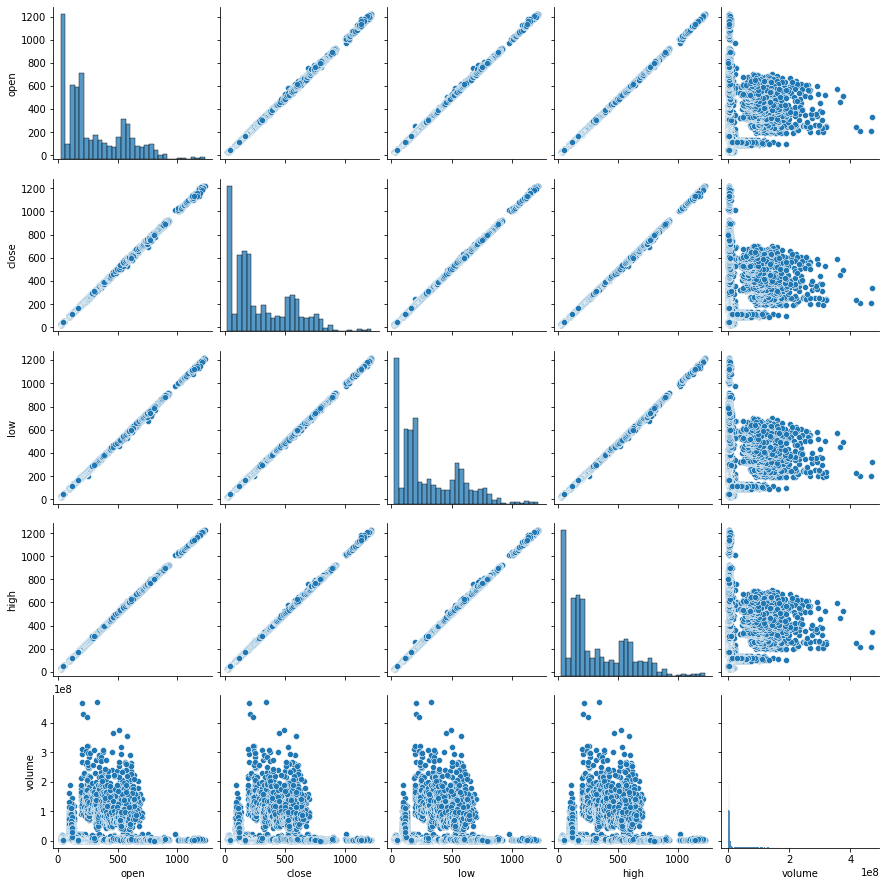

In [10]:
#Pairplot gives estimation about all columns in dataset
sns.pairplot(data_upd.drop(['symbol'],axis=1))

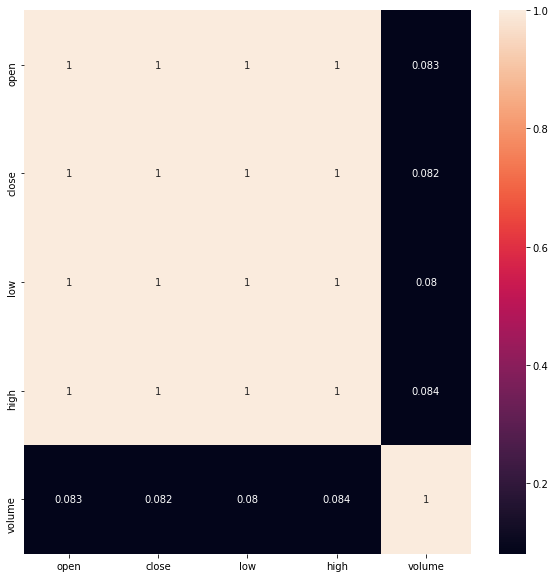

In [11]:
#Observed Correlation between columns
plt.figure(figsize=(10,10))
sns.heatmap(data_upd.drop(['symbol'],axis=1).corr(),annot=True)

In [12]:
#Variables created to plot values
y1= data_upd[data_upd['symbol']=='AAPL'].close.values
y2= data_upd[data_upd['symbol']=='ADM'].close.values
y3= data_upd[data_upd['symbol']=='AMZN'].close.values
y4= data_upd[data_upd['symbol']=='GOOGL'].close.values
y5= data_upd[data_upd['symbol']=='IBM'].close.values

y6= data_upd[data_upd['symbol']=='AAPL'].volume.values
y7= data_upd[data_upd['symbol']=='ADM'].volume.values
y8= data_upd[data_upd['symbol']=='AMZN'].volume.values
y9= data_upd[data_upd['symbol']=='GOOGL'].volume.values
y10= data_upd[data_upd['symbol']=='IBM'].volume.values

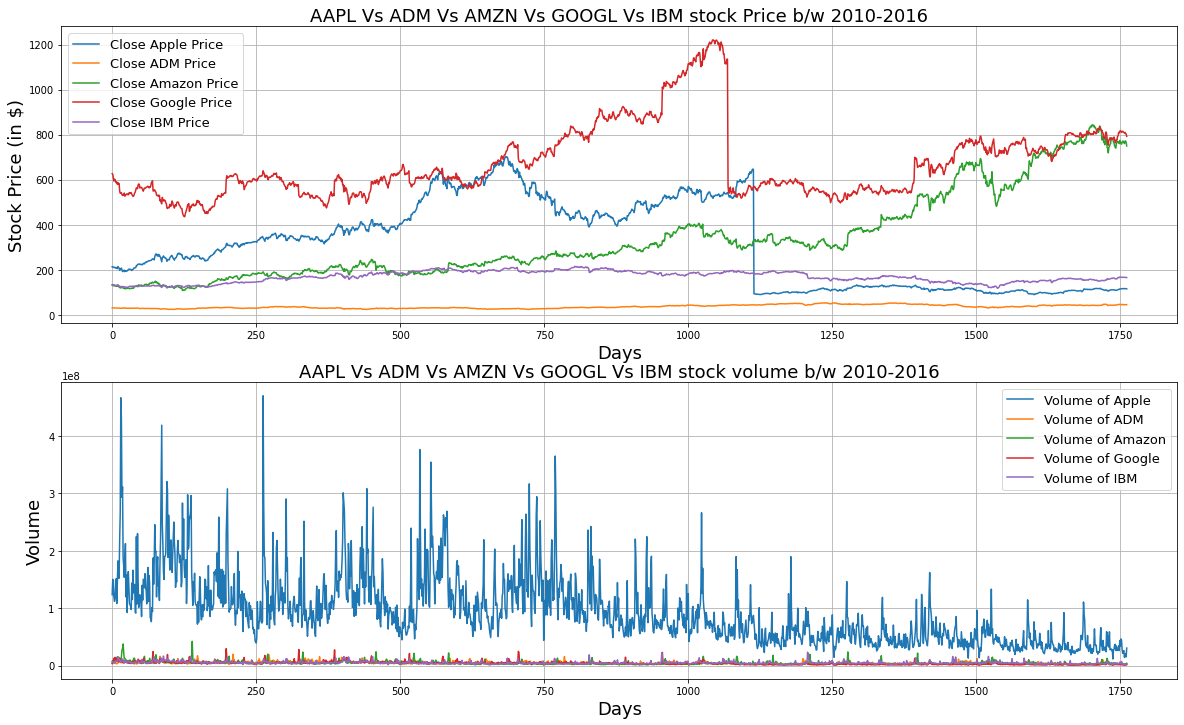

In [13]:
#Visualization
plt.figure(figsize= (20,12))
x= np.arange(0,y1.shape[0],1)
plt.subplot(2,1,1)
plt.plot(x,y1,label= 'Close Apple Price')
plt.plot(x,y2,label = 'Close ADM Price')
plt.plot(x,y3,label= 'Close Amazon Price')
plt.plot(x,y4,label= 'Close Google Price')
plt.plot(x,y5,label= 'Close IBM Price')

plt.title('AAPL Vs ADM Vs AMZN Vs GOOGL Vs IBM stock Price b/w 2010-2016',fontsize=18)
plt.xlabel('Days',fontsize=18)
plt.ylabel('Stock Price (in $)',fontsize=18)
plt.legend(loc='best',prop={'size':13})
plt.grid(axis='both', which= 'major')

plt.subplot(2,1,2)
plt.plot(x,y6,label= 'Volume of Apple ')
plt.plot(x,y7,label = 'Volume of ADM')
plt.plot(x,y8,label= 'Volume of Amazon')
plt.plot(x,y9,label= 'Volume of Google')
plt.plot(x,y10,label= 'Volume of IBM')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Volume',fontsize=18)
plt.title('AAPL Vs ADM Vs AMZN Vs GOOGL Vs IBM stock volume b/w 2010-2016',fontsize=18)
plt.legend(loc='best',prop={'size':13})
plt.grid(which='major', axis='both')

plt.show()

In [14]:
#One hot Encoding symbol column
data_upd=pd.get_dummies(data_upd, columns=['symbol'])

In [15]:
#Dataset after encoding
data_upd

,date,open,close,low,high,volume,symbol_AAPL,symbol_ADM,symbol_AMZN,symbol_GOOGL,symbol_IBM
0,2010-01-04,213.429998,214.009998,212.380001,214.499996,123432400.0,1,0,0,0,0
1,2010-01-04,31.480000,31.469999,31.330000,31.840000,3472500.0,0,1,0,0,0
2,2010-01-04,136.250000,133.899994,133.139999,136.610001,7599900.0,0,0,1,0,0
3,2010-01-04,626.950006,626.750011,624.240011,629.510005,3908400.0,0,0,0,1,0
4,2010-01-04,131.179993,132.449997,130.850006,132.970001,6155300.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8805,2016-12-30,116.650002,115.820000,115.430000,117.199997,30586300.0,1,0,0,0,0
8806,2016-12-30,45.419998,45.650002,45.029999,45.689999,2509000.0,0,1,0,0,0
8807,2016-12-30,766.469971,749.869995,748.280029,767.400024,4125300.0,0,0,1,0,0
8808,2016-12-30,803.210022,792.450012,789.619995,803.289978,1728300.0,0,0,0,1,0


In [16]:
#Seperating features and labels for training and testing
X = np.array(data_upd.drop(['date','close','low','high'],axis=1))
y = np.array(data_upd['close'])

In [17]:
#Checking shape
print(X.shape)
print(y.shape)

(8810, 7)
(8810,)


In [18]:
#Scaling features b/w 0 and 1 to get best results 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [19]:
X

array([[0.15757489, 0.2616654 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00631796, 0.00628426, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09341435, 0.01507103, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.61732279, 0.007674  , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.64786518, 0.00257106, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.11851162, 0.00517788, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [20]:
#Scaling labels b/w 0 and 1 
temp = scaler.fit_transform(np.reshape(y,(len(y),1)))
y = temp.reshape(-1)
print(y.shape)
print(y)

(8810,)
[0.15873613 0.00611199 0.09175508 ... 0.60677587 0.64237759 0.11858597]


In [21]:
print(y.min())
print(y.max())

0.0
1.0


In [22]:
print(X.min())
print(X.max())

0.0
1.0


In [23]:
#Creating time-series data

length= 500 #for 5 companies each of 100 days i.e 100*5
X_ts=[]
y_ts=[]

for i in range(length, len(X)-4):
    X_ts.append(X[i-length:i]) #X_ts contain value of features for past 100 days for 5 companies
    y_ts.append(y[i:i+5]) #y_ts contains closing price for past 100 days for 5 companies

#converting them in numpy array
X_ts = np.array(X_ts)
y_ts = np.array(y_ts)

In [24]:
print(X_ts.shape)
print(y_ts.shape)

(8306, 500, 7)
(8306, 5)


In [25]:
#spliting time-series data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_ts,y_ts, test_size=0.3, shuffle=True, random_state=1)

In [26]:
y_train

array([[0.00246654, 0.15654552, 0.41863363, 0.11472312, 0.29747243],
       [0.16988989, 0.52518792, 0.13874467, 0.43720371, 0.00102842],
       [0.43009677, 0.12373642, 0.2709342 , 0.00865377, 0.14572621],
       ...,
       [0.28011472, 0.01044306, 0.13901222, 0.50500418, 0.11626993],
       [0.27688733, 0.47666827, 0.138544  , 0.05949783, 0.01954833],
       [0.19968062, 0.00372071, 0.08647085, 0.40314044, 0.08955611]])

In [27]:
#Weights and Baises
# Using Weights & Biases for Experiment tracking and dataset versioning

%%capture 
!pip install wandb -qqq
import wandb

In [29]:
!wandb login

wandb: Currently logged in as: prasantdixit (use `wandb login --relogin` to force relogin)


In [54]:
#Creating Callback for plotting onto Weights and Biases framework

from wandb.keras import WandbCallback

experiment_name = wandb.util.generate_id()
wandb.init(
    project="NewYork Stock Price Prediction- V2",
    group=experiment_name,
    config={
        "layer_1": 128,
        "layer_2": 128,
        "layer_3": 32,
        "activation_1": "tanh",
        "activation_2": "linear",
        "dropout": 0.2,
        "optimizer": "adam",
        "loss": "mean_squared_error",
        "metric": "accuracy",
        "epoch": 200,
        "batch_size": 32
    })
config = wandb.config


In [55]:
config.keys

<bound method Config.keys of {'layer_1': 128, 'layer_2': 128, 'layer_3': 32, 'activation_1': 'tanh', 'activation_2': 'linear', 'dropout': 0.2, 'optimizer': 'adam', 'loss': 'mean_squared_error', 'metric': 'accuracy', 'epoch': 200, 'batch_size': 32}>

In [56]:
#Creating model

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.layers import Input

In [57]:
#Creating LSTM layer(Long-Short Term Memory)
def lstm_layer(hidden):
    
    model= Sequential()
    model.add(LSTM(hidden, activation='tanh',return_sequences=True))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

In [58]:
#Creating RNN model
def rnn(hidden1, hidden2, hidden3):
    
    model= Sequential()
    model.add(Input((length,7,)))
    model.add(lstm_layer(hidden1))
    model.add(lstm_layer(hidden2))
    model.add(LSTM(hidden3, activation='tanh',return_sequences= False))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    model.add(Dense(5, activation= 'linear'))
    model.compile(optimizer= 'adam', loss='mean_squared_error',metrics=['accuracy'])
    
    return model

In [59]:
model = rnn(128,128,32)
model.summary() #Summary of model created

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_11 (Sequential)   (None, 500, 128)          70144     
_________________________________________________________________
sequential_12 (Sequential)   (None, 500, 128)          132096    
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                20608     
_________________________________________________________________
batch_normalization_11 (Batc (None, 32)                128       
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 223,141
Trainable params: 222,565
Non-trainable params: 576
_____________________________________________

In [60]:
#Creating Checkpoint for tracking best model
from keras.callbacks import ModelCheckpoint
check= ModelCheckpoint('/resultant_model.h5', monitor='val_loss',save_best_only= True, verbose= 1)

In [61]:
his = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=config.epoch, batch_size=config.batch_size, callbacks=[check,WandbCallback()])

Epoch 1/200
182/182 [==============================] - 21s 87ms/step - loss: 0.6609 - accuracy: 0.2593 - val_loss: 0.0542 - val_accuracy: 0.2035

Epoch 00001: val_loss improved from inf to 0.05420, saving model to /resultant_model.h5
Epoch 2/200
182/182 [==============================] - 14s 79ms/step - loss: 0.2257 - accuracy: 0.3329 - val_loss: 0.0412 - val_accuracy: 0.3146

Epoch 00002: val_loss improved from 0.05420 to 0.04115, saving model to /resultant_model.h5
Epoch 3/200
182/182 [==============================] - 14s 78ms/step - loss: 0.1257 - accuracy: 0.4106 - val_loss: 0.0247 - val_accuracy: 0.9274

Epoch 00003: val_loss improved from 0.04115 to 0.02473, saving model to /resultant_model.h5
Epoch 4/200
182/182 [==============================] - 14s 77ms/step - loss: 0.0728 - accuracy: 0.5178 - val_loss: 0.0155 - val_accuracy: 0.9310

Epoch 00004: val_loss improved from 0.02473 to 0.01554, saving model to /resultant_model.h5
Epoch 5/200
182/182 [==============================]

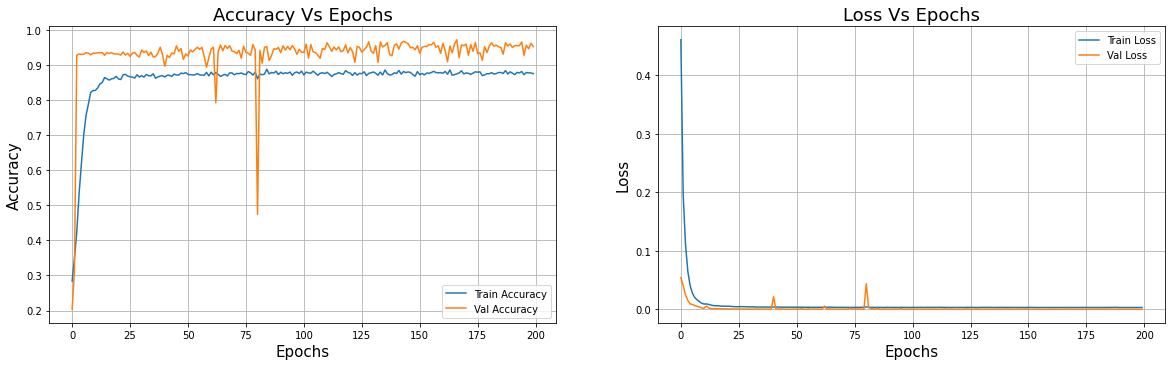

In [62]:
#plotting accuracy and loss

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.plot(his.history['accuracy'],label='Train Accuracy')
plt.plot(his.history['val_accuracy'],label='Val Accuracy')
plt.legend(loc='best')
plt.xlabel('Epochs',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Accuracy Vs Epochs',fontsize=18)
plt.grid(which='major', axis='both')

plt.subplot(2,2,2)
plt.plot(his.history['loss'],label='Train Loss')
plt.plot(his.history['val_loss'],label='Val Loss')
plt.legend(loc='best')
plt.xlabel('Epochs',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title('Loss Vs Epochs',fontsize=18)
plt.grid(which='major', axis='both')

plt.show()

In [63]:
model.save('resultant_model.h5')
from keras.models import load_model
model = load_model('/resultant_model.h5')

In [64]:
pred= model.predict(X_test)
pred.shape

(2492, 5)

In [65]:
from sklearn.metrics import r2_score,mean_squared_error
print('Mean Squared Error: '+str(mean_squared_error(y_test,pred)))
print('R2 score: '+str(r2_score(y_test,pred)))

Mean Squared Error: 0.00024413124376974573
R2 score: 0.9947692702914575


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


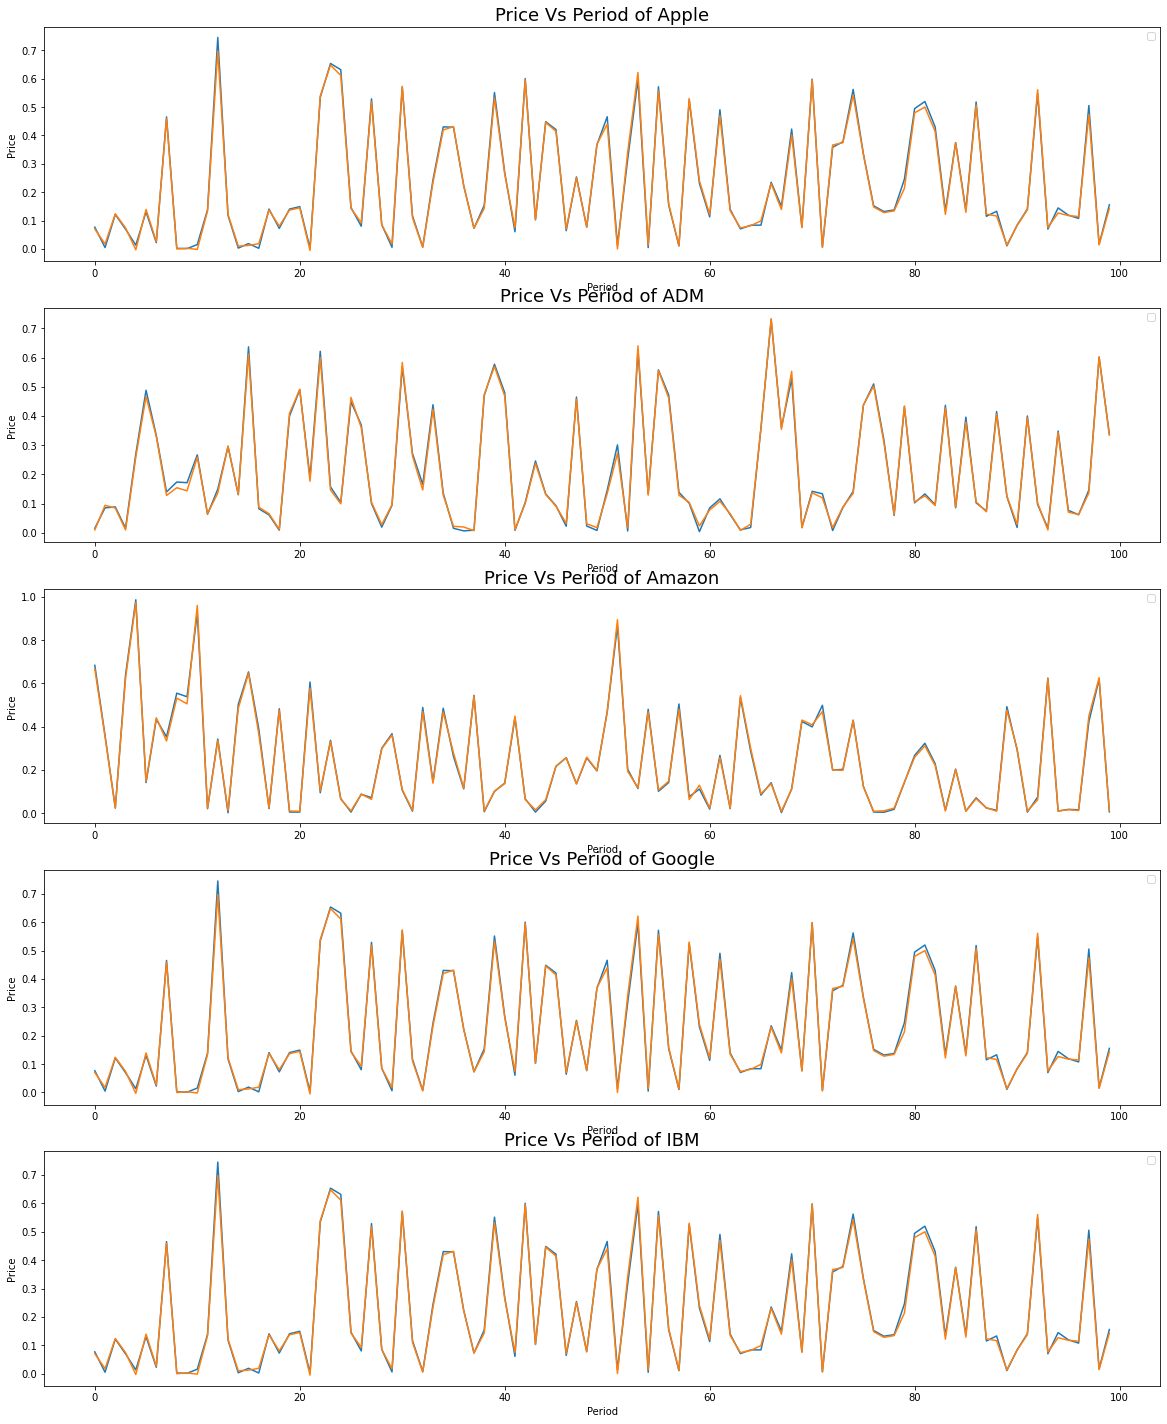

In [68]:
#plotting accuracy for each company
plt.figure(figsize=(20,25))
plt.subplot(5,1,1)
plt.plot(y_test[:100,0])
plt.plot(pred[:100,0])
plt.xlabel('Period',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.title('Price Vs Period of Apple',fontsize=18)
plt.legend(loc='best')

plt.subplot(5,1,2)
plt.plot(y_test[:100,1])
plt.plot(pred[:100,1])
plt.xlabel('Period',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.title('Price Vs Period of ADM',fontsize=18)
plt.legend(loc='best')

plt.subplot(5,1,3)
plt.plot(y_test[:100,2])
plt.plot(pred[:100,2])
plt.xlabel('Period',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.title('Price Vs Period of Amazon',fontsize=18)
plt.legend(loc='best')

plt.subplot(5,1,4)
plt.plot(y_test[:100,0])
plt.plot(pred[:100,0])
plt.xlabel('Period',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.title('Price Vs Period of Google',fontsize=18)
plt.legend(loc='best')

plt.subplot(5,1,5)
plt.plot(y_test[:100,0])
plt.plot(pred[:100,0])
plt.xlabel('Period',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.title('Price Vs Period of IBM',fontsize=18)
plt.legend(loc='best')

plt.show()